In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [2]:
data = pd.read_csv('data/sample-mid2-data/Meals_served_overtime.csv', sep=';')
data.head()

,Campaign Year,Meals Served
0,2010,40139
1,2011,127020
2,2012,168193
3,2013,153115
4,2014,202102


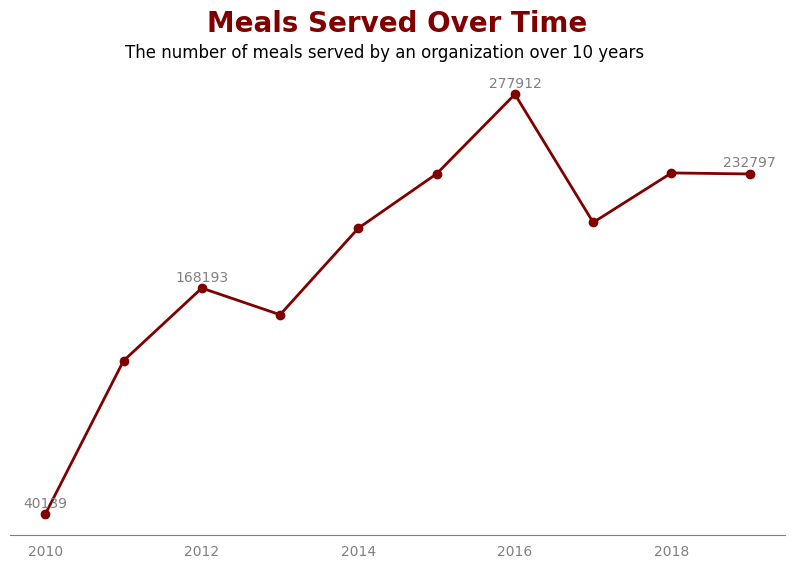

In [3]:
X, y = data['Campaign Year'], data['Meals Served']

# 1.1 Create a line chart for this data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, y, color='maroon', marker='.', linestyle='solid', linewidth=2, markersize=12)

# 1.2 Remove the left, right, top spine
ax.spines[['left', 'right', 'top']].set_visible(False)

# 1.3 Remove the ticks located at the bottom
ax.tick_params(axis='x', which='both', bottom=False)

# 1.4 Color the xtick labels and the spine to grey
ax.tick_params(axis='x', which='both', colors='grey')
# plt.xticks(color='grey')
ax.spines['bottom'].set_color('grey')

# 1.5 Annotate some data points    
for x, y in zip(X, y):
    if x in [2010, 2012, 2016, 2019]:
        ax.annotate(y, (x, y), color='grey', textcoords='offset points', xytext=(0, 5), ha='center')


# 1.6 Add title and subtitle for this chart.
# ax.set_title('Meals Served Over Time', loc='center', fontsize=18)
plt.title('Meals Served Over Time', loc='center', fontsize=20, pad=30, fontdict={'fontweight': 'bold', 'color': 'maroon'})
plt.suptitle('The number of meals served by an organization over 10 years', fontsize=12, y=0.93)

# Remove the y axis label
# ax.set_yticklabels([])
# ax.tick_params(axis='y', which='both', left=False)
ax.get_yaxis().set_visible(False)

plt.show()

# Problem 2

In [4]:
data = pd.read_csv('data/sample-mid2-data/new_client_tier_share_processed.csv')
data.head()

,Tier,# of account,% accounts,revenue ($M),% revenue
0,A+,19.0,2.0,3.9,21.0
1,A,77.0,7.0,4.7,25.0
2,B,338.0,31.0,6.0,32.0
3,C,425.0,39.0,2.8,15.0
4,D,24.0,2.0,0.4,2.0


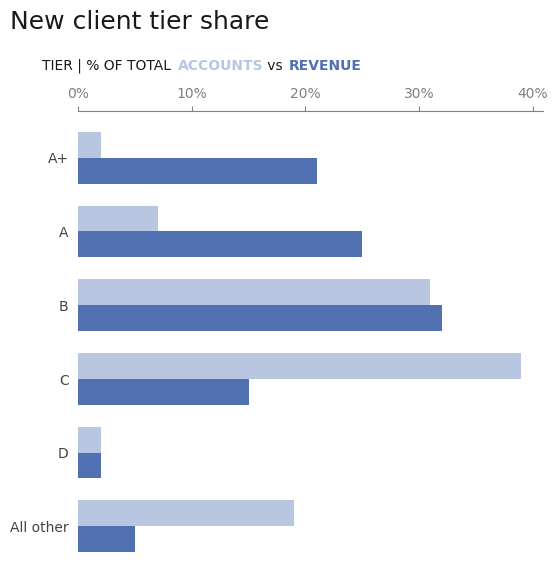

In [5]:
# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot dual horizontal bar chart
bar_width = 0.35
y_pos = np.arange(len(data.index))
ax.barh(y_pos - bar_width/2, data['% accounts'], bar_width, color='#B8C6E2')
ax.barh(y_pos + bar_width/2, data['% revenue'], bar_width, color='#5170B2')

# Reverse the order of y axis
ax.invert_yaxis()

# Adding the category names as y-ticks
ax.set_yticks(y_pos)
ax.set_yticklabels(data['Tier'])

# Remove the left, right, top spine
ax.spines[['left', 'right', 'bottom']].set_visible(False)

# Remove the ticks located at the bottom
ax.tick_params(axis='x', which='both', bottom=False)

# Remove y tick
ax.tick_params(axis='y', which='both', left=False)

# Set x tick
ax.set_xticks([i for i in range(0, 41, 10)])
ax.set_xticklabels([f'{i}%' for i in range(0, 41, 10)])
ax.xaxis.tick_top()

# Set x tick label color
ax.tick_params(axis='x', which='both', colors='grey')
ax.spines['top'].set_color('grey')

# Set y tick label color
ax.tick_params(axis='y', which='both', colors='#434343')

ax.text(-6, -1.75, 'New client tier share', fontdict={'color': '#191919', 'fontsize': 18, 'fontweight': 'light'})
ax.text(-3.2, -1.2, 'TIER | % OF TOTAL                      vs', fontdict={'color': '#191919', 'fontsize': 10, 'fontweight': 'light'})
ax.text(8.75, -1.2, 'ACCOUNTS', fontdict={'color': '#B8C6E2', 'fontsize': 10, 'fontweight': 600})
ax.text(18.5, -1.2, 'REVENUE', fontdict={'color': '#5170B2', 'fontsize': 10, 'fontweight': 600})
plt.show()

# Problem 3

In [6]:
data = pd.read_csv('data/sample-mid2-data/capacity-demand.csv')
data.head()

,cob_date,capacity,demand
0,28/02/19 01:00,29328,45170
1,03/07/19 05:00,29371,36492
2,02/07/19 14:00,24576,47880
3,16/07/19 20:00,20009,45827
4,27/08/19 08:00,20316,40573


In [7]:
data['cob_date'] = pd.to_datetime(data['cob_date'], format='%d/%m/%y %H:%M')
data.head()

,cob_date,capacity,demand
0,2019-02-28 01:00:00,29328,45170
1,2019-07-03 05:00:00,29371,36492
2,2019-07-02 14:00:00,24576,47880
3,2019-07-16 20:00:00,20009,45827
4,2019-08-27 08:00:00,20316,40573


In [8]:
data['month_year'] = data['cob_date'].dt.strftime('%Y-%m')
data.head()

,cob_date,capacity,demand,month_year
0,2019-02-28 01:00:00,29328,45170,2019-02
1,2019-07-03 05:00:00,29371,36492,2019-07
2,2019-07-02 14:00:00,24576,47880,2019-07
3,2019-07-16 20:00:00,20009,45827,2019-07
4,2019-08-27 08:00:00,20316,40573,2019-08


In [9]:
grouped_data = data.groupby('month_year').agg({'capacity': 'sum', 'demand': 'sum'}).reset_index()
grouped_data = grouped_data.sort_values('month_year')
grouped_data = grouped_data.iloc[3:]
grouped_data

,month_year,capacity,demand
3,2019-04,203023,363437
4,2019-05,201379,350360
5,2019-06,237419,370402
6,2019-07,234959,445196
7,2019-08,297892,516347
8,2019-09,236085,386567
9,2019-10,149309,238481
10,2019-11,273376,479551
11,2019-12,316077,535143


In [10]:
from matplotlib.patches import Rectangle

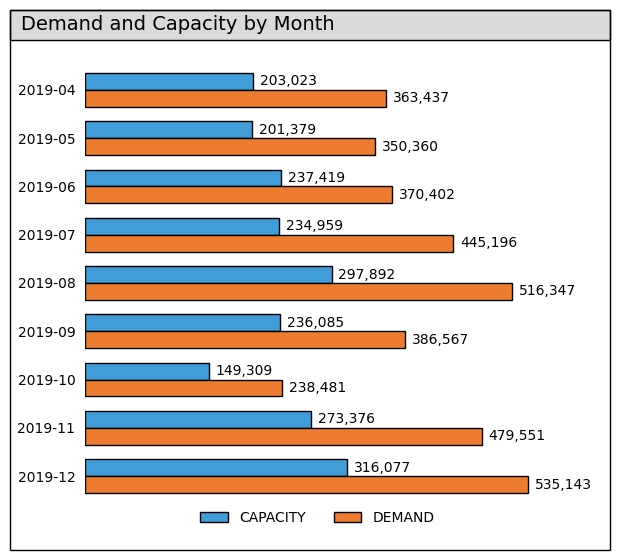

In [11]:
# Create double horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 6))

# Plot dual horizontal bar chart
bar_width = 0.35
y_pos = np.arange(len(grouped_data.index))
ax.barh(y_pos - bar_width/2, grouped_data['capacity'], bar_width, color='#409DD7', edgecolor='black')
ax.barh(y_pos + bar_width/2, grouped_data['demand'], bar_width, color='#ED7C30', edgecolor='black')

# Set y label
ax.set_yticks(y_pos)
ax.set_yticklabels(grouped_data['month_year'])

# Remove all spines
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.get_xaxis().set_visible(False)

# Remove all ticks
ax.tick_params(axis='both', which='both', bottom=False, left=False)

# Legend
ax.legend(['CAPACITY', 'DEMAND'], loc = 'lower center', 
          bbox_to_anchor = (0.5, -0.05), ncol = 2, frameon = False)

# Annotate
for x, y in zip(grouped_data['capacity'], y_pos - bar_width/2):
    ax.annotate(f'{x:,}', (x, y), color='black', textcoords='offset points', xytext=(5, 0), va='center')

for x, y in zip(grouped_data['demand'], y_pos + bar_width/2):
    ax.annotate(f'{x:,}', (x, y), color='black', textcoords='offset points', xytext=(5, 0), va='center')

# Title
# ax.set_title('Demand and Capacity by Month                         ', fontsize=18, pad=5,
#                 fontdict={'fontweight': 'light', 'color': 'black'},
#                 bbox={'facecolor': '#D9DAD9', 'edgecolor': 'black'})
# Add a rectangle that spans the whole figure width for the title background

title_background = Rectangle((0, 0.9), width=1, height=0.05, transform=fig.transFigure, 
                             facecolor='#D9DAD9', zorder=0, edgecolor='black', linewidth=1)
fig.patches.extend([title_background])

# Add the title text above the rectangle
plt.figtext(0.28, 0.91, 'Demand and Capacity by Month', ha='center', va='bottom', fontsize=14)

outline = Rectangle((0, 0.05), width=1, height=0.9, transform=fig.transFigure, 
                    fill=False, edgecolor='black', linewidth=1, zorder=0)
fig.patches.extend([outline])

# Reverse the order of y axis
ax.invert_yaxis()

plt.show()

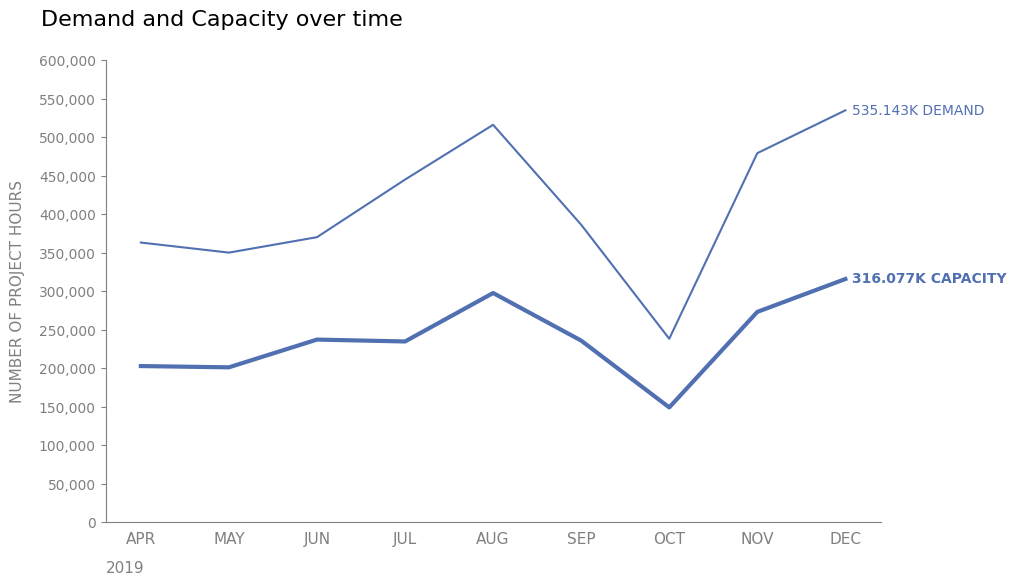

In [12]:
# Create line plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot line chart
ax.plot(grouped_data['month_year'], grouped_data['capacity'], color='#5170B2', linewidth=3)
ax.plot(grouped_data['month_year'], grouped_data['demand'], color='#5170B2')

# Remove spines
ax.spines[['right', 'top']].set_visible(False)

# Remove x ticks
ax.tick_params(axis='x', which='both', bottom=False)

# Set x label to %b
ax.set_xticks(grouped_data['month_year'])
ax.set_xticklabels(pd.to_datetime(grouped_data['month_year']).dt.strftime('%b').str.upper(), fontsize=11)
ax.tick_params(axis='x', which='both', colors='grey')
ax.spines['bottom'].set_color('grey')
ax.set_xlabel('2019', fontsize=11, color='grey', labelpad=10, loc='left')

# Set y label 10,000
ax.set_yticks([i for i in range(0, 600_001, 50_000)])
ax.set_yticklabels([f'{i:,}' for i in ax.get_yticks()])
ax.tick_params(axis='y', which='both', colors='grey')
ax.spines['left'].set_color('grey')
ax.set_ylabel('NUMBER OF PROJECT HOURS', rotation=90, ha='center', fontsize=11, color='grey', labelpad=10)

# Annotate last data point
ax.annotate(f'{grouped_data.iloc[-1, 1]/1_000}K CAPACITY', (grouped_data.iloc[-1, 0], grouped_data.iloc[-1, 1]), 
            color='#5170B2', fontweight = 'bold', textcoords='offset points', xytext=(5, 0), va='center')
ax.annotate(f'{grouped_data.iloc[-1, 2]/1_000}K DEMAND', (grouped_data.iloc[-1, 0], grouped_data.iloc[-1, 2]),
            color='#5170B2', textcoords='offset points', xytext=(5, 0), va='center')

plt.title('Demand and Capacity over time', fontsize=16, pad=25,
          x = 0.15, fontdict={'fontweight': 'light', 'color': 'black'})

plt.show()